**Simple Linier Regression Data Set**

In [4]:
import pandas as pd

bola = {'diameter' : [6,8,10,14,18],
        'harga' : [7,9,13,17.5,20]}

bola_df = pd.DataFrame(bola)
bola_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,20.0


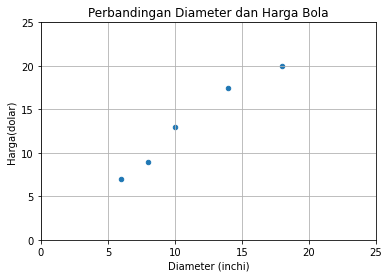

In [5]:
import matplotlib.pyplot as plt

bola_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Bola')
plt.xlabel('Diameter (inchi)')
plt.ylabel('Harga(dolar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()


**Model Simple Linier Regression**

1. Penyesuaian Dataset

In [6]:
import numpy as np

x = np.array(bola_df['diameter'])
y = np.array(bola_df['harga'])

print(f'x : {x}')
print(f'y : {y}')

x : [ 6  8 10 14 18]
y : [ 7.   9.  13.  17.5 20. ]


In [7]:
x = x.reshape(-1,1)
x.shape

(5, 1)

In [8]:
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

**Training Simple Linier Regression Model**

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

**Visualisasi Simple Linear Regression Model**

In [10]:
x_vis = np.array([0, 25]).reshape(-1,1)
y_vis = model.predict(x_vis)

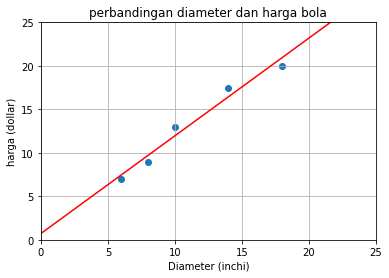

In [11]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')

plt.title('perbandingan diameter dan harga bola')
plt.xlabel('Diameter (inchi)')
plt.ylabel('harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid()
plt.show()

In [12]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 0.7241379310344875
slope: [1.12284483]


**Mencari Nilai Slope**

In [13]:
print(f'x:\n{x}\n')
print(f'x flatten: {x.flatten()}\n')
print(f'y: {y}')

x:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

x flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 20. ]


**Varience**

In [14]:
varience_x = np.var(x.flatten(), ddof=1)

print(f'varience: {varience_x}')

varience: 23.2


**Covarience**

In [15]:
np.cov(x.flatten(), y)

array([[23.2 , 26.05],
       [26.05, 30.2 ]])

In [20]:
covariance_xy = np.cov(x.flatten(), y)[0][1]
print(f'covariance: {covariance_xy}')

covariance: 26.049999999999997


**Nilai Slope**

In [22]:
slope = covariance_xy / varience_x

print(f'slope: {slope}')

slope: 1.1228448275862069


**Mencari Nilai Intercept**

In [23]:
intercept = np.mean(y) - slope * np.mean(x)

print(f'intercept: {intercept}')

intercept: 0.724137931034484


**Prediksi Harga Bola Berdasarkan Ukuran Diameter**

In [24]:
diameter_bola = np.array([7,13,15]).reshape(-1,1)
diameter_bola

array([[ 7],
       [13],
       [15]])

**Prediksi Harga Bola**

In [25]:
prediksi_harga = model.predict(diameter_bola)
prediksi_harga

array([ 8.58405172, 15.32112069, 17.56681034])

In [26]:
for dmtr, hrg in zip(diameter_bola, prediksi_harga):
  print(f'Diameter : {dmtr} prediksi harga: {hrg}')

Diameter : [7] prediksi harga: 8.584051724137934
Diameter : [13] prediksi harga: 15.321120689655174
Diameter : [15] prediksi harga: 17.566810344827587


**Evaluasi Simple Linear Regression Model Training & Testing Dataset**

In [28]:
x_train = np.array([6,8,10,14,18]).reshape(-1,1)
y_train = np.array([7,9,13,17.5,20])

x_test = np.array([8,9,11,16,12]).reshape(-1,1)
y_test = np.array([11,8.5,15,18,11])

**Training Simple Linear Regression Model**

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

**Evauasi Linear Regression Model**

In [30]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)

r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6213315163349296
